In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/processed/clean_jobs.csv")

In [3]:
print("Total jobs:", df.shape[0])


Total jobs: 10000


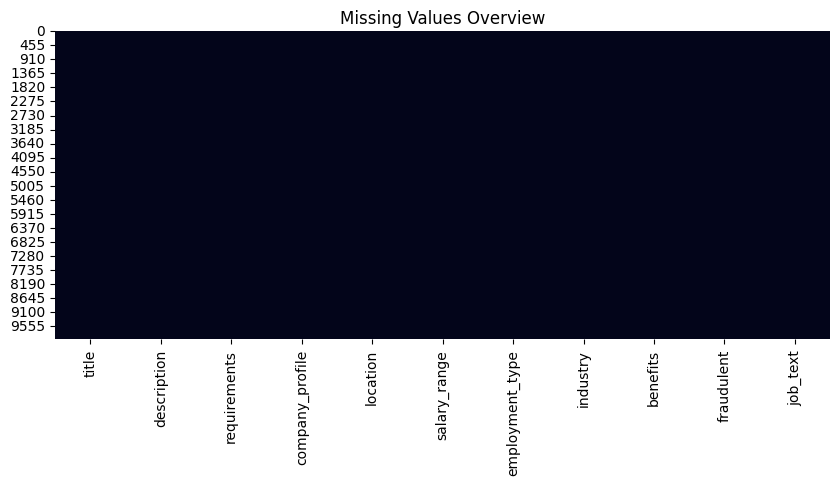

In [4]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Overview")
plt.show()


# The missing value heatmap shows negligible missing data after preprocessing.
# Column-wise analysis confirms that all critical text fields were successfully cleaned and standardized.

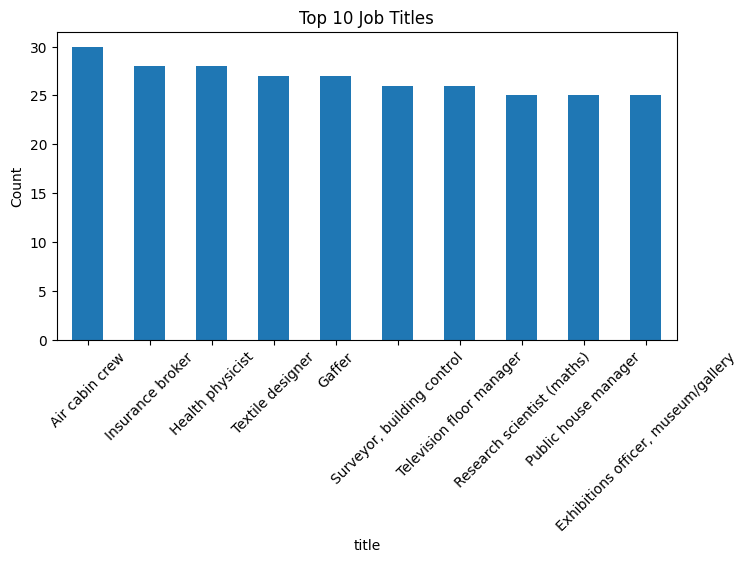

In [10]:
top_titles = df['title'].value_counts().head(10)

plt.figure(figsize=(8,4))
top_titles.plot(kind='bar')
plt.title("Top 10 Job Titles")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# The chart shows that the top job titles are evenly distributed, with no single role dominating the dataset.
# This indicates a balanced and diverse job dataset, which helps reduce bias in content-based job recommendations.
# Therefore, recommendations are driven more by job descriptions and required skills rather than title frequency alone.

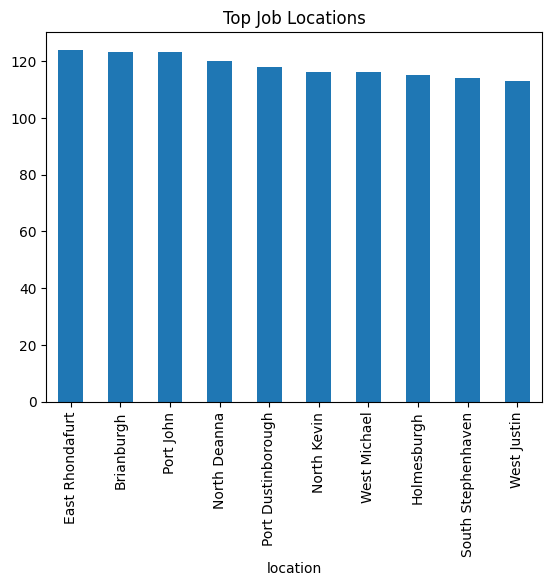

In [6]:
df['location'].value_counts().head(10).plot(kind='bar')
plt.title("Top Job Locations")
plt.show()

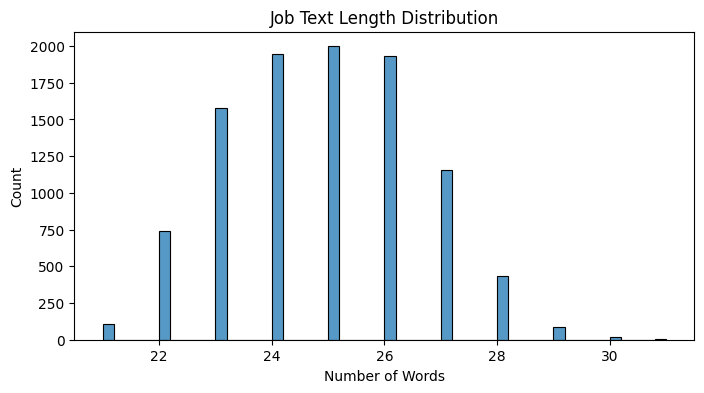

In [ ]:
df['job_text'] = (
    df['title'].fillna('') + " " +
    df['description'].fillna('') + " " +
    df['requirements'].fillna('')
)


df['text_length'] = df['job_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50)
plt.title("Job Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()

# The distribution shows that most job descriptions have a similar number of words, with the majority lying between 22 and 27 words.
# This uniformity reduces bias caused by text length and supports the use of TF-IDF with cosine similarity for content-based job recommendation.
#